## **Data Preparation**

In [ ]:
from google.colab import drive
drive. mount('/drive',force_remount = True)

Mounted at /drive


In [ ]:
import pandas as pd
df = pd.read_csv('/drive/MyDrive/INF2179/Sources/INF2178_A3_data.csv')
df.head(5)


,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2


## **Exploratory Data Analysis**

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%pip install dfply
from dfply import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.4/612.4 kB 6.6 MB/s eta 0:00:00


In [ ]:
# Add the columns change in the math score and change in the reading score from fall to spring
df['change_in_reading_scores'] = df['springreadingscore'] - df['fallreadingscore']
df['change_in_math_scores'] = df['springmathscore'] - df['fallmathscore']

In [ ]:
# Summary Statistics for dependent variable change_in_reading_scores
df >> group_by(X.incomegroup) >> summarize(n=X['change_in_reading_scores'].count(), mean=X['change_in_reading_scores'].mean(), std=X['change_in_reading_scores'].std())


,incomegroup,n,mean,std
0,1,4729,10.878279,7.462176
1,2,3726,11.716932,7.906122
2,3,3478,12.308387,8.967606


In [ ]:
# Summary Statistics for dependent variable change_in_math_scores
df >> group_by(X.incomegroup) >> summarize(n=X['change_in_math_scores'].count(), mean=X['change_in_math_scores'].mean(), std=X['change_in_math_scores'].std())


,incomegroup,n,mean,std
0,1,4729,9.958547,6.406540
1,2,3726,10.896224,6.853736
2,3,3478,11.399178,7.339003


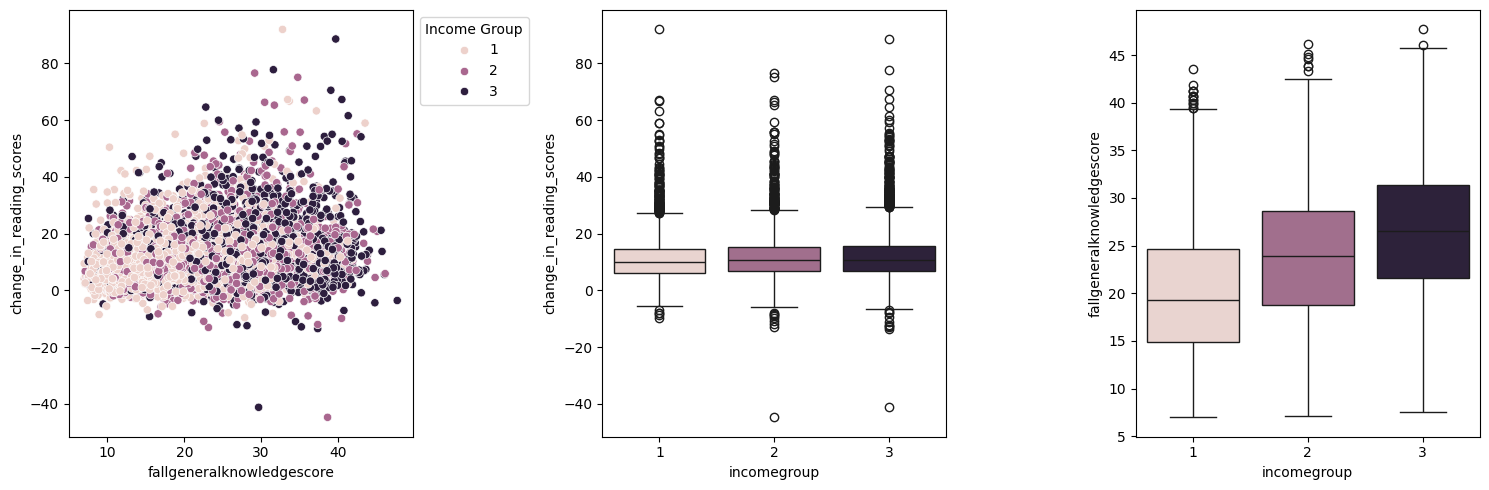

In [ ]:
#Data Visualization
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
# Scatter plot
scatter = sns.scatterplot(
    data=df, x="fallgeneralknowledgescore", y="change_in_reading_scores",
    hue="incomegroup", ax=axs[0]
)
scatter.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Income Group')

# Box plot for change in reading scores
box1 = sns.boxplot(
    data=df, x="incomegroup", y="change_in_reading_scores", hue="incomegroup", ax=axs[1]
)
box1.legend_.remove()

# Box plot for fall general knowledge score
box2 = sns.boxplot(
    data=df, x="incomegroup", y="fallgeneralknowledgescore", hue="incomegroup", ax=axs[2]
)
box2.legend_.remove()
plt.tight_layout()
plt.show()

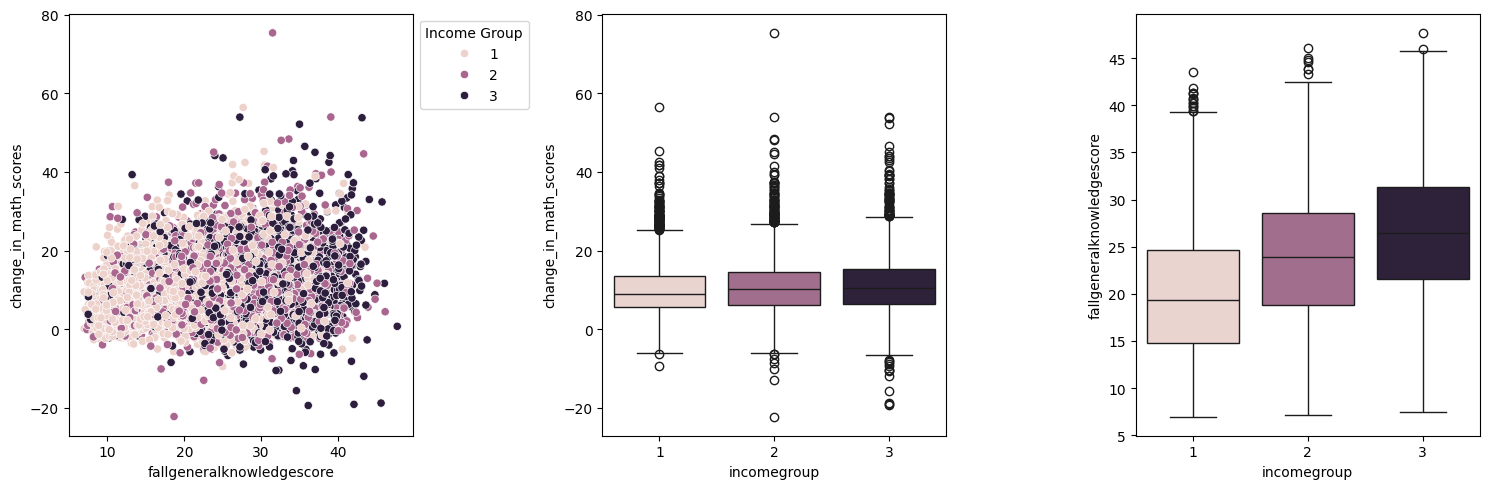

In [ ]:
#Data Visualization
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
# Scatter plot
scatter = sns.scatterplot(
    data=df, x="fallgeneralknowledgescore", y="change_in_math_scores",
    hue="incomegroup", ax=axs[0]
)
scatter.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Income Group')

# Box plot for change in math scores
box1 = sns.boxplot(
    data=df, x="incomegroup", y="change_in_math_scores", hue="incomegroup", ax=axs[1]
)
box1.legend_.remove()

# Box plot for fall general knowledge score
box2 = sns.boxplot(
    data=df, x="incomegroup", y="fallgeneralknowledgescore", hue="incomegroup", ax=axs[2]
)
box2.legend_.remove()
plt.tight_layout()
plt.show()

In [ ]:
# Descriptive statistics table change in reading score by income group
quantiles = df.groupby('incomegroup')['change_in_reading_scores'].quantile([0.25, 0.5, 0.75]).unstack()
quantiles['IQR'] = quantiles[0.75] - quantiles[0.25]
# Calculate bounds for outliers
lower_bound = quantiles[0.25] - 1.5 * quantiles['IQR']
upper_bound = quantiles[0.75] + 1.5 * quantiles['IQR']
# Identify outliers
is_outlier = df.apply(lambda x: (x['change_in_reading_scores'] < lower_bound[x['incomegroup']]) |
                                  (x['change_in_reading_scores'] > upper_bound[x['incomegroup']]), axis=1)
# Count outliers by group
num_outliers_per_group = df[is_outlier].groupby('incomegroup').size()
# Merge the outliers count with the quantiles table
final_table = quantiles.merge(num_outliers_per_group.rename('Outliers'), left_index=True, right_index=True, how='left').fillna(0)
# Rename columns for clarity
final_table.columns = ['Q1', 'Median', 'Q3', 'IQR', 'Outliers']
# Display the final table
print(final_table)

                 Q1  Median     Q3     IQR  Outliers
incomegroup                                         
1            5.9800   9.990  14.45  8.4700       134
2            6.8000  10.695  15.40  8.6000       127
3            6.7125  10.750  15.77  9.0575       178


In [ ]:
# Descriptive statistics table fall general knowledge score by income group
quantiles = df.groupby('incomegroup')['fallgeneralknowledgescore'].quantile([0.25, 0.5, 0.75]).unstack()
quantiles['IQR'] = quantiles[0.75] - quantiles[0.25]
# Calculate bounds for outliers
lower_bound = quantiles[0.25] - 1.5 * quantiles['IQR']
upper_bound = quantiles[0.75] + 1.5 * quantiles['IQR']
# Identify outliers
is_outlier = df.apply(lambda x: (x['fallgeneralknowledgescore'] < lower_bound[x['incomegroup']]) |
                                  (x['fallgeneralknowledgescore'] > upper_bound[x['incomegroup']]), axis=1)
# Count outliers by group
num_outliers_per_group = df[is_outlier].groupby('incomegroup').size()
# Merge the outliers count with the quantiles table
final_table = quantiles.merge(num_outliers_per_group.rename('Outliers'), left_index=True, right_index=True, how='left').fillna(0)
# Rename columns for clarity
final_table.columns = ['Q1', 'Median', 'Q3', 'IQR', 'Outliers']
# Display the final table
print(final_table)

                  Q1   Median        Q3      IQR  Outliers
incomegroup                                               
1            14.8400  19.2980  24.64300  9.80300        15
2            18.8100  23.8690  28.59275  9.78275         7
3            21.6065  26.5055  31.36700  9.76050         2


In [ ]:
# Descriptive statistics table change in math score by income group
quantiles = df.groupby('incomegroup')['change_in_math_scores'].quantile([0.25, 0.5, 0.75]).unstack()
quantiles['IQR'] = quantiles[0.75] - quantiles[0.25]
# Calculate bounds for outliers
lower_bound = quantiles[0.25] - 1.5 * quantiles['IQR']
upper_bound = quantiles[0.75] + 1.5 * quantiles['IQR']
# Identify outliers
is_outlier = df.apply(lambda x: (x['change_in_math_scores'] < lower_bound[x['incomegroup']]) |
                                  (x['change_in_math_scores'] > upper_bound[x['incomegroup']]), axis=1)
# Count outliers by group
num_outliers_per_group = df[is_outlier].groupby('incomegroup').size()
# Merge the outliers count with the quantiles table
final_table = quantiles.merge(num_outliers_per_group.rename('Outliers'), left_index=True, right_index=True, how='left').fillna(0)
# Rename columns for clarity
final_table.columns = ['Q1', 'Median', 'Q3', 'IQR', 'Outliers']
# Display the final table
print(final_table)

               Q1  Median       Q3     IQR  Outliers
incomegroup                                         
1            5.57    9.04  13.4700  7.9000       107
2            6.31   10.22  14.5475  8.2375        97
3            6.43   10.60  15.3200  8.8900        80


## **One-Way ANCOVAs**

In [ ]:
# Explore the change in reading score by income group where covariates is fall general knowledge
%pip install pingouin
from pingouin import ancova


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 4.4 MB/s eta 0:00:00


In [ ]:
# One-Way ANCOVAs where dependent variable is Change in reading scores, independent Variable: Income group (categorical), and Covariates is fall general knowledge
ancova(data=df, dv='change_in_reading_scores', covar='fallgeneralknowledgescore', between='incomegroup')

,Source,SS,DF,F,p-unc,np2
0,incomegroup,287.485906,2,2.251247,1.053126e-01,0.000377
1,fallgeneralknowledgescore,14054.124684,1,220.110317,2.354473e-49,0.018117
2,Residual,761671.036393,11929,NaN,NaN,NaN


In [ ]:
# One-Way ANCOVAs where dependent variable is Change in reading scores, ndependent Variable: Income group (categorical), and Covariates is fall general knowledge
ancova(data=df, dv='change_in_math_scores', covar='fallgeneralknowledgescore', between='incomegroup')

,Source,SS,DF,F,p-unc,np2
0,incomegroup,55.879616,2,0.624286,5.356614e-01,0.000105
1,fallgeneralknowledgescore,22425.932956,1,501.083959,9.425259e-109,0.040312
2,Residual,533880.499781,11929,NaN,NaN,NaN


**Interaction plots**

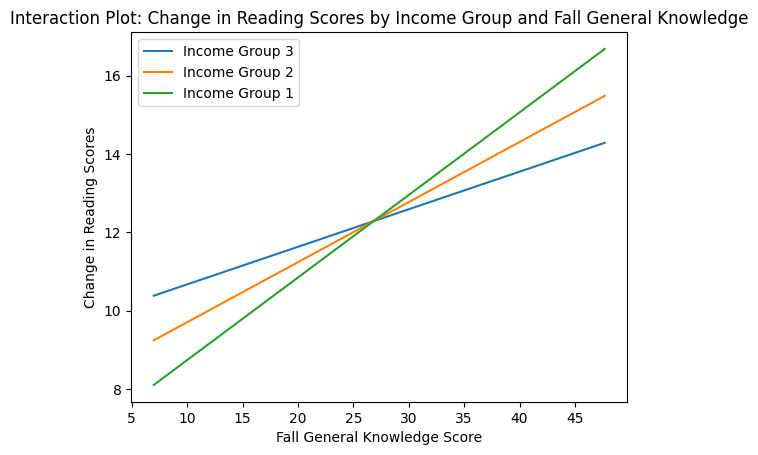

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

# Fit the ANCOVA model with an interaction term
model = ols('change_in_reading_scores ~ incomegroup * fallgeneralknowledgescore', data=df).fit()

# Create a range of covariate values for plotting the interaction
covariate_range = np.linspace(df['fallgeneralknowledgescore'].min(), df['fallgeneralknowledgescore'].max(), 50)

# Plot the interaction
for income_group in df['incomegroup'].unique():
    # Create a DataFrame for the covariate range and income group level
    plot_df = pd.DataFrame({
        'fallgeneralknowledgescore': covariate_range,
        'incomegroup': income_group
    })
    # Predict values for each income group over the covariate range
    plot_df['predicted_change'] = model.predict(plot_df)
    # Plot the predicted values
    plt.plot(plot_df['fallgeneralknowledgescore'], plot_df['predicted_change'], label=f'Income Group {income_group}')

plt.xlabel('Fall General Knowledge Score')
plt.ylabel('Change in Reading Scores')
plt.title('Interaction Plot: Change in Reading Scores by Income Group and Fall General Knowledge')
plt.legend()
plt.show()


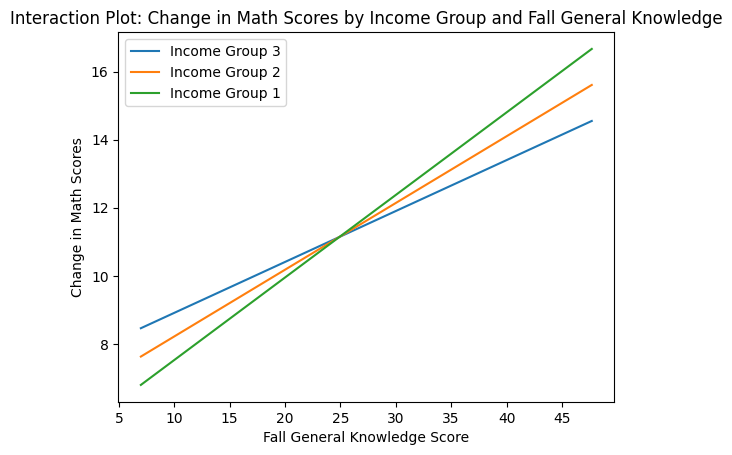

In [ ]:
# Fit the ANCOVA model with an interaction term
model = ols('change_in_math_scores ~ incomegroup * fallgeneralknowledgescore', data=df).fit()

# Create a range of covariate values for plotting the interaction
covariate_range = np.linspace(df['fallgeneralknowledgescore'].min(), df['fallgeneralknowledgescore'].max(), 50)

# Plot the interaction
for income_group in df['incomegroup'].unique():
    # Create a DataFrame for the covariate range and income group level
    plot_df = pd.DataFrame({
        'fallgeneralknowledgescore': covariate_range,
        'incomegroup': income_group
    })
    # Predict values for each income group over the covariate range
    plot_df['predicted_change'] = model.predict(plot_df)
    # Plot the predicted values
    plt.plot(plot_df['fallgeneralknowledgescore'], plot_df['predicted_change'], label=f'Income Group {income_group}')

plt.xlabel('Fall General Knowledge Score')
plt.ylabel('Change in Math Scores')
plt.title('Interaction Plot: Change in Math Scores by Income Group and Fall General Knowledge')
plt.legend()
plt.show()


## **Check for Assumptions**

In [ ]:
!pip install statsmodels


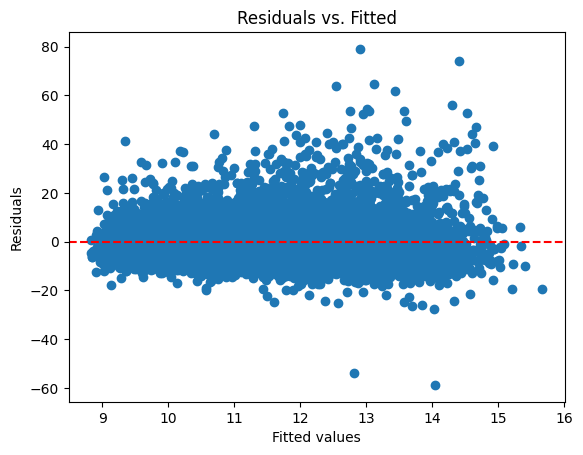

In [ ]:
# Assumption Check for ANCOVAs
# One-Way ANCOVAs where dependent variable is Change in reading scores, ndependent Variable: Income group (categorical), and Covariates is fall general knowledge
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
# Fit the model
model = ols('change_in_reading_scores ~ C(incomegroup) + fallgeneralknowledgescore', data=df).fit()

# Assumption 1 Linearity and homogeneity of variances
# - Plotting residuals vs. predicted values
residuals = model.resid
fitted = model.fittedvalues
plt.scatter(fitted, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted')
plt.axhline(0, color='red', linestyle='--')
plt.show()




In [ ]:
### Homogeneity of variances can also be checked via tests like Levene's or Bartlett's test
print(stats.levene(df['change_in_reading_scores'], df['fallgeneralknowledgescore']))


LeveneResult(statistic=38.206460299566025, pvalue=6.46721628374385e-10)


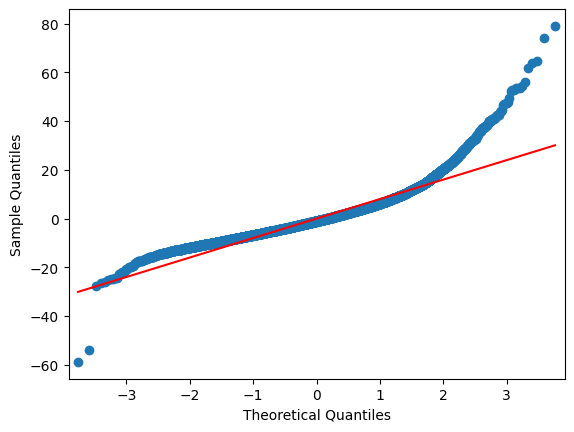

In [ ]:
## Normality of residuals
### Q-Q plot
sm.qqplot(residuals, line='s')
plt.show()

In [ ]:
### Shapiro-Wilk test
print(stats.shapiro(residuals))

ShapiroResult(statistic=0.8996317386627197, pvalue=0.0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


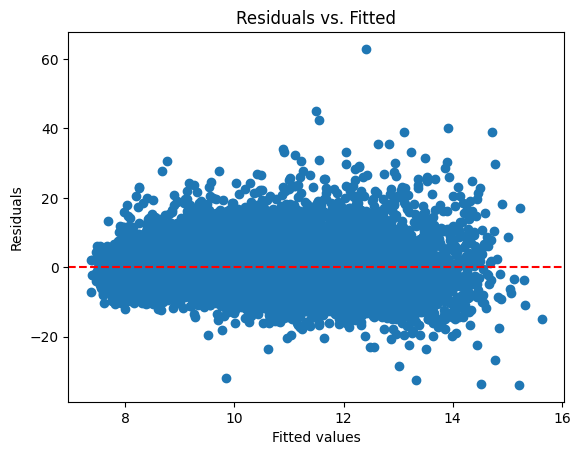

In [ ]:
# Assumption Check for ANCOVAs
# One-Way ANCOVAs where dependent variable is Change in math scores, independent Variable: Income group (categorical), and Covariates is fall general knowledge
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import matplotlib.pyplot as plt

# Fit the model
model = ols('change_in_math_scores ~ C(incomegroup) + fallgeneralknowledgescore', data=df).fit()

# Assumption check
## Linearity and homogeneity of variances: Residuals vs. predicted values plot
residuals = model.resid
fitted = model.fittedvalues
plt.scatter(fitted, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted')
plt.axhline(0, color='red', linestyle='--')
plt.show()


In [ ]:
## Homogeneity of variances: Levene's test
groups = df.groupby('incomegroup')['change_in_math_scores'].apply(list)
print(stats.levene(*groups))

LeveneResult(statistic=22.215180179067378, pvalue=2.344180384098772e-10)


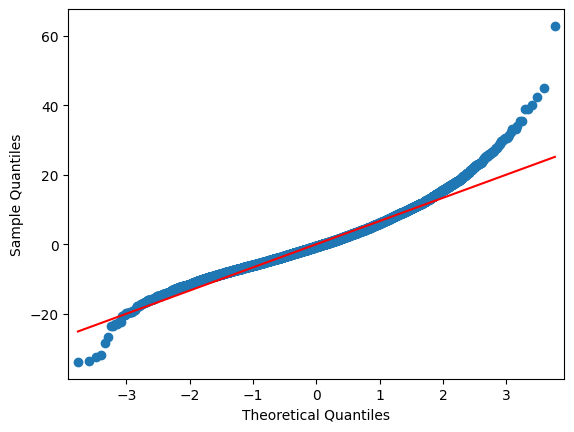

ShapiroResult(statistic=0.9664044380187988, pvalue=0.0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
## Normality of residuals: Q-Q plot and Shapiro-Wilk test
sm.qqplot(residuals, line='s')
plt.show()
print(stats.shapiro(residuals))

In [ ]:
### Shapiro-Wilk test
print(stats.shapiro(residuals))

ShapiroResult(statistic=0.9664044380187988, pvalue=0.0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
